### Ejercicio 3.b

Aproximación mediante metodo de Monte Carlo de la Funcion de Bessel

$$ J_0(x) = \frac{1}{\pi} \int_{0}^{\pi} \cos(x \sin \tau) d\tau$$

en $x = 1$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from math import pi, cos, sin
from scipy.special import jv

In [2]:
bessel_0_1 = jv(0,1) #Valor teorico

In [3]:
N = 10000
phi = lambda x,tau: cos(x*sin(tau)) #La hago depender de x para que sea mas generica, en nuestros ejemplos x=1

In [4]:
uniformes = np.random.uniform(0,1,N)*pi

In [5]:
def estimador_j(n):
    '''Estimador para un n en particular'''
    area_A = pi
    suma_phis = 0
    for i in range(n):
        suma_phis += phi(1,uniformes[i])
    est_esperanza = suma_phis/n
    return area_A/pi * est_esperanza

In [6]:
def generar_estimadores():
    '''De forma eficiente agrega los estimadores todos juntos'''
    estimadores = []
    area_A = pi
    suma_phis = 0
    for n in range(1,N+1):
        suma_phis += phi(1,uniformes[n-1]) #n-esima uniforme agregada
        estimadores.append(area_A/pi * suma_phis/n)
    return estimadores

In [7]:
estimadores_n = np.array(generar_estimadores()) # Contiene los J(n)
error_rel = estimadores_n/bessel_0_1

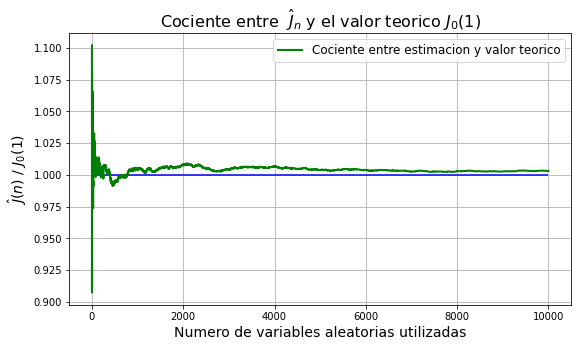

In [8]:
plt.figure(figsize = (9,5))
plt.plot(error_rel, 'g', linewidth = 2, label="Cociente entre estimacion y valor teorico")
plt.hlines(1,1,N,color = 'blue')
plt.title(r"Cociente entre  $\widehat{J}_n$ y el valor teorico $J_0(1)$", fontsize = 16)
plt.legend(fontsize=12)
plt.xlabel("Numero de variables aleatorias utilizadas", fontsize=14)
plt.ylabel(r"$\widehat{J}(n)$ / $J_0(1)$", fontsize = 14)
plt.grid()
plt.show();

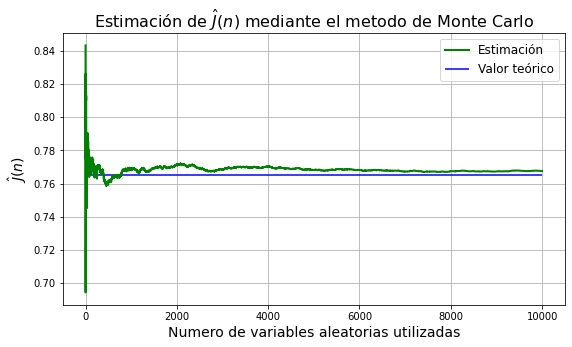

In [9]:
plt.figure(figsize = (9,5))
plt.plot(estimadores_n, 'g', linewidth = 2, label="Estimación")
plt.hlines(bessel_0_1,1,N,color = 'blue', label="Valor teórico")
plt.title(r"Estimación de $\widehat{J}(n)$ mediante el metodo de Monte Carlo", fontsize = 16)
plt.legend(fontsize=12)
plt.xlabel("Numero de variables aleatorias utilizadas", fontsize=14)
plt.ylabel(r"$\widehat{J}(n)$", fontsize = 14)
plt.grid()
plt.show()